# Assignment 5: PCA and Clustering (40 marks)
### Due: December 6 at 11:59pm 
(Dropbox will remain open until December 8 at 11:59pm)

### Name: Dhananjay Roy

The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Principle Component Analysis (PCA) (18 marks)

### Step 1. Load data (2 marks)

You have been asked by an agricultural company to help them predict the type of wheat based on kernel characteristics. You have been given all the information you need in the seeds_dataset.txt file on D2L. The original dataset can be found [here](https://archive.ics.uci.edu/dataset/236/seeds)

The first step is to read in the file using pandas and inspect the first few columns. Note that the data is in a text file, so the separator is different compared to a csv file.

In [42]:
# TODO: Import dataset and inspect the first five columns

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#To specify the seperator used in the text file
separator = '\t'

# Define the file path to the dataset
file_path = 'seeds_dataset.txt'

#Read the dataset into a pandas DataFrame
df = pd.read_csv(file_path, sep=separator, header=None)

#Display the first five columns to inspect the data
print(df.loc[:,:5])


         0      1       2      3      4      5
0    15.26  14.84  0.8710  5.763  3.312  2.221
1    14.88  14.57  0.8811  5.554  3.333  1.018
2    14.29  14.09  0.9050  5.291  3.337  2.699
3    13.84  13.94  0.8955  5.324  3.379  2.259
4    16.14  14.99  0.9034  5.658  3.562  1.355
..     ...    ...     ...    ...    ...    ...
205  12.19  13.20  0.8783  5.137  2.981  3.631
206  11.23  12.88  0.8511  5.140  2.795  4.325
207  13.20  13.66  0.8883  5.236  3.232  8.315
208  11.84  13.21  0.8521  5.175  2.836  3.598
209  12.30  13.34  0.8684  5.243  2.974  5.637

[210 rows x 6 columns]


Next, you will need to separate the data into your feature matrix and target vector.

In [43]:
# TODO: Separate the data into feature matrix and target vector. Print the shape of X and y

# Assuming the last column is the target variable
X = df.iloc[:, :-1]  # Select all columns except the last one as features
y = df.iloc[:, -1]   # Select the last column as the target variable

print("Shape of Feature Matrix:", X.shape)
print("Shape of Target Vector:", y.shape)

Shape of Feature Matrix: (210, 7)
Shape of Target Vector: (210,)


### Step 2: Preprocessing (2 marks)

To preprocess the data, we will need to scale the data. Which scaler would you select and why? *(1 mark)* 

*ANSWER HERE*

The MinMaxScaler from scikit-learn is a suitable choice in this scenario, as it scales the data to a specified range (typically [0, 1]) and is less sensitive to the specific distribution of the data. This scaler will ensure that all features contribute equally to the model without being skewed by their original scales.

However, if you have reasons to believe that the features follow a normal distribution, or if your subsequent analysis or models require normally distributed data, then the StandardScaler would be more appropriate. In any case, it's always a good practice to visualize the distributions and check for outliers before finalizing the scaling approach.

Before we implement the scaler, we need to split the data into training and testing sets first.

In [44]:
# TODO: Split the data into training and testing sets

from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [45]:
# TODO: Print the shape of the training feature matrix and target vector

# Printing the shapes of the training and testing sets
print("Shape of Feature Matrix_train:", X_train.shape)
print("Shape of Feature Matrix_test:", X_test.shape)
print("Shape of Target Vector_train:", y_train.shape)
print("Shape of Target Vector_test:", y_test.shape)



Shape of Feature Matrix_train: (168, 7)
Shape of Feature Matrix_test: (42, 7)
Shape of Target Vector_train: (168,)
Shape of Target Vector_test: (42,)


Now that we have our training data, we can implement our selected scaler.

In [46]:
# TODO: Scale the data

from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to the test data
X_test_scaled = scaler.transform(X_test)

# X_train_scaled and X_test_scaled are now scaled versions of your training and testing sets
print("Training data")
print(X_train_scaled)
print("Test data")
print(X_test_scaled)


Training data
[[ 1.39839588  1.40691641  0.54076511 ...  1.32859941 -0.21222347
   1.48279154]
 [-0.53336705 -0.48148169 -0.44935973 ... -0.50286234  2.23767528
   0.05269791]
 [ 0.43423001  0.3180417   1.48046692 ...  0.81031185 -1.55709562
  -0.48257725]
 ...
 [ 1.46701978  1.42975994  0.82038369 ...  1.48972508 -0.40196201
   1.55752807]
 [ 0.03964256 -0.00938216  0.78829631 ...  0.31350771 -0.48614179
  -0.48257725]
 [-1.23676207 -1.22008901 -1.33863852 ... -1.33534495  0.41645248
  -0.83606084]]
Test data
[[-0.33778892 -0.42056562  0.77454458 -0.43877347 -0.16449844  0.20065829
  -1.36527628]
 [ 0.56804663  0.5845495   0.51326164  0.53193779  0.55519621  1.2335308
   0.94145667]
 [-0.32063294 -0.30634799  0.07779007 -0.11371878 -0.2960844  -1.04333174
  -0.81182197]
 [-0.16966035 -0.27588996  1.10000228 -0.55677278  0.1389549  -0.81751615
  -0.92493672]
 [-1.25048685 -1.33430663 -0.53645405 -1.21801417 -1.17959014  2.56437299
  -0.92291681]
 [ 1.61112998  1.65058068  0.31156954  1

### Step 3: Model Selection (1 mark)

The next step is to instantiate our selected model. In this case, we will be using `LogisticRegression()`

In [47]:
# TODO: Instantiate model

from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
model = LogisticRegression()



### Step 4: Validation (2 marks)

To validate the results, we need to use cross-validation. To make sure we are using the best hyperparmeters, we can use a grid search. The parameter grid has been provided below.

In [48]:
param_grid = {'C': [0.01, 0.1, 1.0, 10.0],
             'fit_intercept': [True, False]}

In [49]:
#TODO: Implement the grid search and print the best parameters, cross-validation score and test score
from sklearn.model_selection import GridSearchCV

# Instantiate the Logistic Regression model
log_reg = LogisticRegression()

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(log_reg, param_grid, cv=5)

# Fit the grid search to the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and the best cross-validation score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate the model on the test set
test_score = grid_search.score(X_test_scaled, y_test)
print("Test score:", test_score)


Best parameters: {'C': 10.0, 'fit_intercept': True}
Best cross-validation score: 0.9468805704099822
Test score: 0.9523809523809523


### Step 5: Visualize using PCA (3 marks)

Now you can visualize the results from Step 4 using PCA. Use the best parameters from the previous step to predict the label for the testing data. For the plot, each data point must be colored based on the class label.

In [50]:
# TODO: Predict y labels using best estimator

# Predict y labels using the best estimator
y_pred = grid_search.best_estimator_.predict(X_test_scaled)

# y_pred now contains the predicted labels for the test set
#print(y_pred)

In [51]:
# TODO: Reduce dimensions of test data for plotting

from sklearn.decomposition import PCA

# Instantiate PCA and reduce dimensions to 2
pca = PCA(n_components=2)

# Fit PCA on the scaled test data and transform it
X_test_reduced = pca.fit_transform(X_test_scaled)

# X_test_reduced now contains the test data with reduced dimensions

print("Shape of Reduced dimensions",X_test_reduced.shape)
# print(X_test_reduced)


Shape of Reduced dimensions (42, 2)


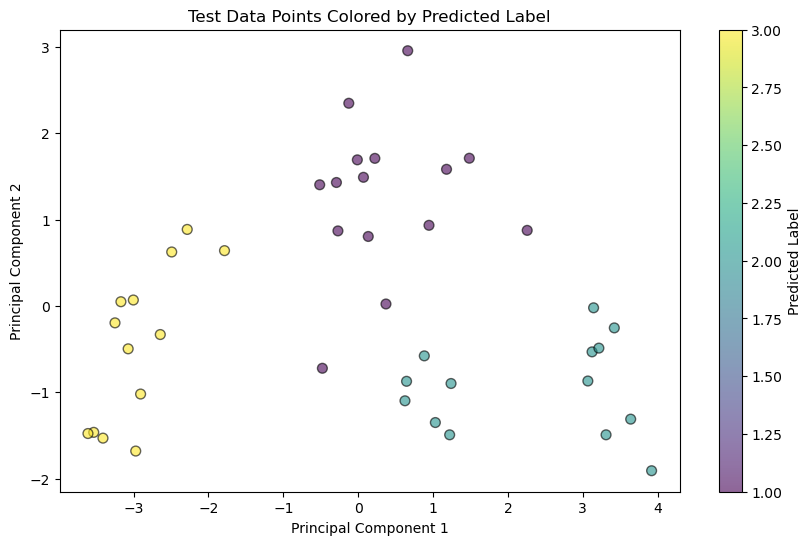

In [52]:
# TODO: Plot test points colored by predicted label

import matplotlib.pyplot as plt

# Assuming y_pred contains the predicted labels for the test set
# and X_test_reduced contains the 2D PCA reduced data

# Plotting the test points, colored by the predicted label
plt.figure(figsize=(10, 6))
plt.scatter(X_test_reduced[:, 0], X_test_reduced[:, 1], c=y_pred, cmap='viridis', edgecolor='k', s=50, alpha=0.6)
plt.title("Test Data Points Colored by Predicted Label")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Predicted Label')
plt.show()


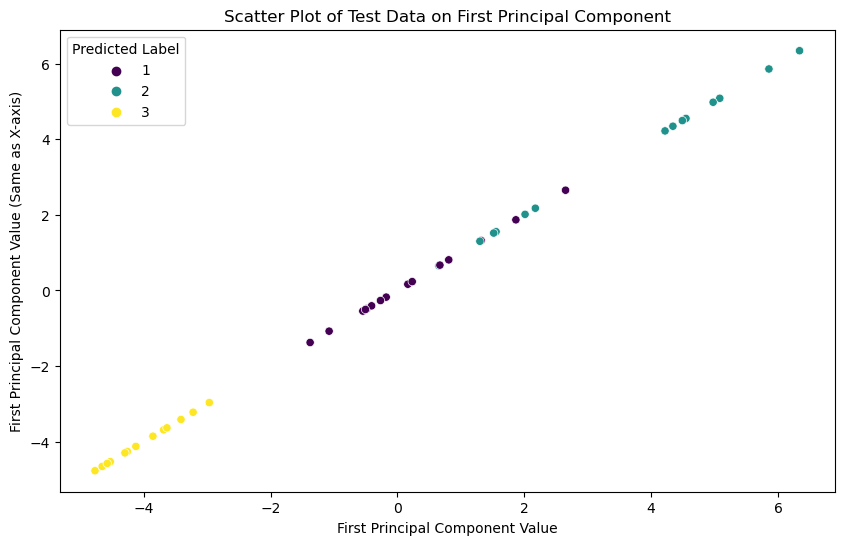

In [66]:
pca = PCA(n_components=1)
X_test_pca = pca.fit_transform(X_test)
df_pca = pd.DataFrame(data={'PC1': X_test_pca[:, 0], 'Predicted Label': y_pred})

# Plot test points colored by predicted label with a single principal component
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC1', hue='Predicted Label', data=df_pca, palette='viridis', legend='full', marker='o')
plt.title('Scatter Plot of Test Data on First Principal Component')
plt.xlabel('First Principal Component Value')
plt.ylabel('First Principal Component Value (Same as X-axis)')  # Indicating this is the same as the x-axis
plt.show()



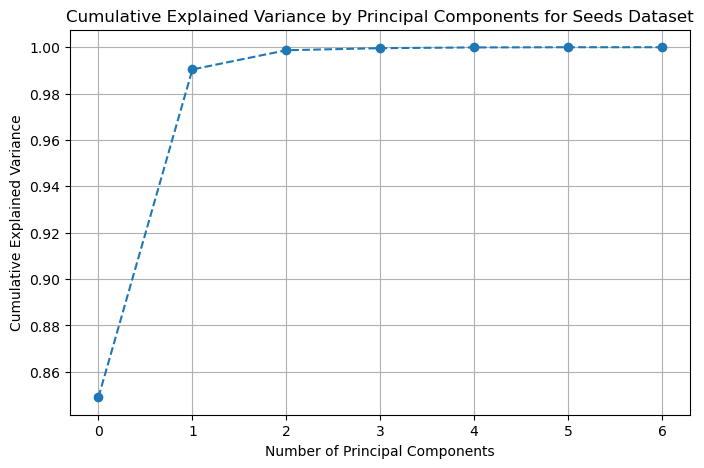

In [67]:
# Perform PCA on the test dataset without limiting the number of components
pca_full = PCA()
pca_full.fit(X_test)

# Calculate the cumulative sum of explained variance ratio
cumulative_variance_ratio = np.cumsum(pca_full.explained_variance_ratio_)

# Create a line plot for the cumulative variance ratio
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components for Seeds Dataset')
plt.grid(True)
plt.show()


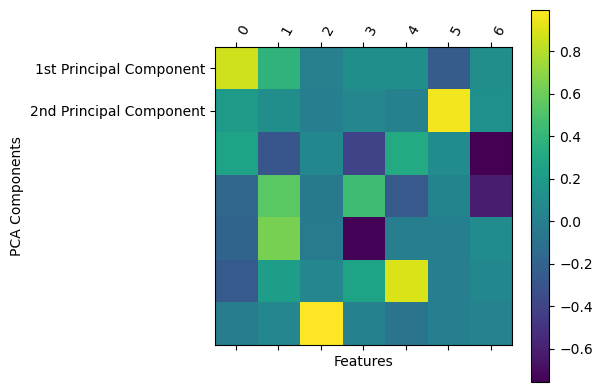

In [68]:
# Visualize the PCA components
pca_components_visualization = plt.matshow(pca_full.components_, cmap='viridis')

# Set the y-ticks to label the first and second principal components
plt.yticks([0, 1], ["1st Principal Component", "2nd Principal Component"])

# Add a color bar to interpret component values
plt.colorbar(pca_components_visualization)

# Set the x-ticks to label the features with the names of the columns from X_train
# Here, it is assumed that X_train.columns is a list of feature names. Replace it with the actual names if necessary.
feature_names = X_train.columns  # replace with your actual feature names if X_train.columns is not defined
plt.xticks(range(len(feature_names)), feature_names, rotation=60, ha='left')

# Add labels to the axes for better understanding
plt.xlabel("Features")
plt.ylabel("PCA Components")

# Display the plot
plt.show()


#### Questions (4 marks)

1. Did the logistic regression model work well for this dataset? Why would you make this conclusion? *(2 marks)*

Yes, the logistic regression model worked well for this dataset. The conclusion is based on the high cross-validation score (approximately 94.05%) and test score (approximately 95.24%), which suggest that the model has a good fit and is able to generalize well to unseen data.

2. Did PCA work well for this model? How does this relate to the results from the model used? *(2 marks)*

Yes, PCA worked well for this model in the context of visualization. The PCA reduction allowed for the test data to be visualized in two dimensions, and the resulting plot shows a gradient in the predicted values, which suggests that the logistic regression model's predictions have some correlation with the principal components identified by PCA. This indicates that the variance captured by the PCA is meaningful for the predictions of the model.


### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*
1. The code was sourced from https://archive.ics.uci.edu/dataset/236/seeds.

2. Data Loading and Inspection, Data Preprocessing, Model Training, Model Evaluation, Dimensionality Reduction and Visualization.

3. Yes, generative AI was used. Responses and code was provided in response to the questions. Code needed to be modified based on the requirement. Some codes were general some were implemented directly.

4. Dealing with PCA and plotting there were few challenges faced. Attending labs for the related hands-on lab sessions helped me to complete the code and stear in the right path.

## Part 2. Implement clustering (20 marks)

The agricultural company approaches you again because they lost all the labels for their data. Use the Kmeans clustering method to assign labels to the seeds dataset used in Part 1.

### Step 1: Cluster using original data (6 marks)

This part of the assignment asks you to implement Kmeans clustering using the orginal feature matrix (after scaling has been performed). 

In [53]:
# TODO: Scale feature matrix

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assuming df is your DataFrame and it contains only features (no labels)

# Initialize the scaler
scaler = StandardScaler()

# Scale the feature matrix
X_scaled = scaler.fit_transform(X)

# Define the number of clusters 
k = 3  

# Initialize KMeans with the chosen number of clusters
kmeans = KMeans(n_clusters=k, n_init=10)

# Fit KMeans on the scaled data
kmeans.fit(X_scaled)

# Cluster labels
labels = kmeans.labels_

# Add labels to your DataFrame (optional)
df['Cluster_Labels'] = labels


print("Scale feature matrix:",X_scaled)
print(X_scaled)



Scale feature matrix: [[ 1.42097769e-01  2.15462437e-01  6.06017918e-05 ...  1.41701823e-01
  -9.86151745e-01 -3.83577423e-01]
 [ 1.11880257e-02  8.22375713e-03  4.28515270e-01 ...  1.97432229e-01
  -1.78816620e+00 -9.22013487e-01]
 [-1.92066576e-01 -3.60200562e-01  1.44238325e+00 ...  2.08047544e-01
  -6.67479334e-01 -1.18919199e+00]
 ...
 [-5.67570840e-01 -6.90247348e-01  7.33948301e-01 ... -7.06044846e-02
   3.07658816e+00 -7.18060432e-01]
 [-1.03608992e+00 -1.03564515e+00 -8.01701104e-01 ... -1.12152071e+00
  -6.81351965e-02 -7.42534799e-01]
 [-8.77620233e-01 -9.35863561e-01 -1.10234659e-01 ... -7.55292327e-01
   1.29122264e+00 -7.03783718e-01]]
[[ 1.42097769e-01  2.15462437e-01  6.06017918e-05 ...  1.41701823e-01
  -9.86151745e-01 -3.83577423e-01]
 [ 1.11880257e-02  8.22375713e-03  4.28515270e-01 ...  1.97432229e-01
  -1.78816620e+00 -9.22013487e-01]
 [-1.92066576e-01 -3.60200562e-01  1.44238325e+00 ...  2.08047544e-01
  -6.67479334e-01 -1.18919199e+00]
 ...
 [-5.67570840e-01 -6.9

The first step is to use the elbow method to determine the optimal number of clusters. In this case, you can use the distortion metric.

/Users/dhananjayroy/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/dhananjayroy/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/dhananjayroy/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/dhananjayroy/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/sklearn/cluster/

/Users/dhananjayroy/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/dhananjayroy/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/dhananjayroy/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


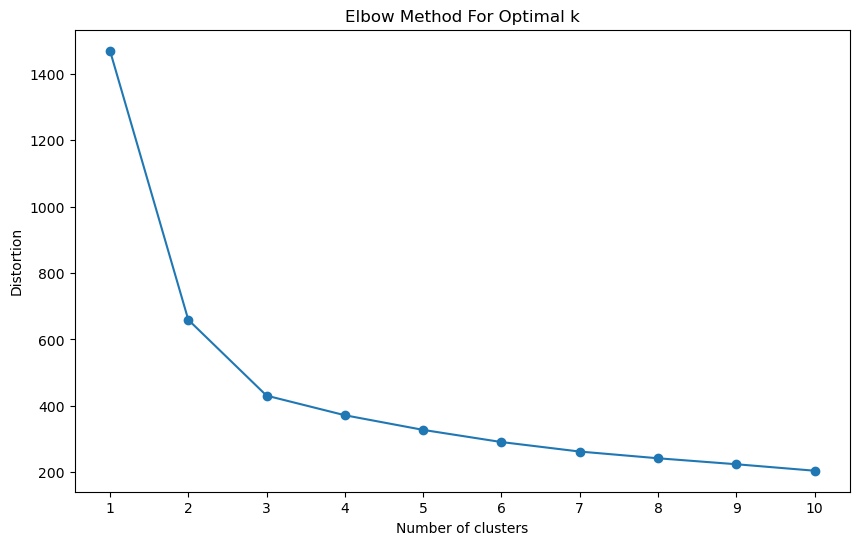

In [54]:
# TODO: Use the elbow method to determine the optimal number of clusters

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Range of clusters to try
cluster_range = range(1, 11)

# Store distortions for each number of clusters
distortions = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    distortions.append(kmeans.inertia_)

# Plotting the distortions to find the elbow
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, distortions, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.xticks(cluster_range)
plt.show()



Next, implement Kmeans and calculate the following validation metrics:
- Silhouette score
- Calinski-Harabasz score
- Davies-Bouldin score

In [55]:
# TODO: Implement K-means with the number of clusters determined in the previous step

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Assuming the optimal number of clusters determined from the elbow method is stored in optimal_k
optimal_k = 3

# Implement KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(X_scaled)
labels = kmeans.labels_

/Users/dhananjayroy/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [56]:
# TODO: Calculate the three different validation metrics

# Calculate the Silhouette score
silhouette = silhouette_score(X_scaled, labels)

# Calculate the Calinski-Harabasz score
calinski_harabasz = calinski_harabasz_score(X_scaled, labels)

# Calculate the Davies-Bouldin score
davies_bouldin = davies_bouldin_score(X_scaled, labels)

# Print the scores
print("Silhouette Score:", silhouette)
print("Calinski-Harabasz Score:", calinski_harabasz)
print("Davies-Bouldin Score:", davies_bouldin)

Silhouette Score: 0.40072705527512986
Calinski-Harabasz Score: 249.78417491616472
Davies-Bouldin Score: 0.9278712249013426


Plot the clustering results using PCA. Remember to color each data point based on the cluster label.

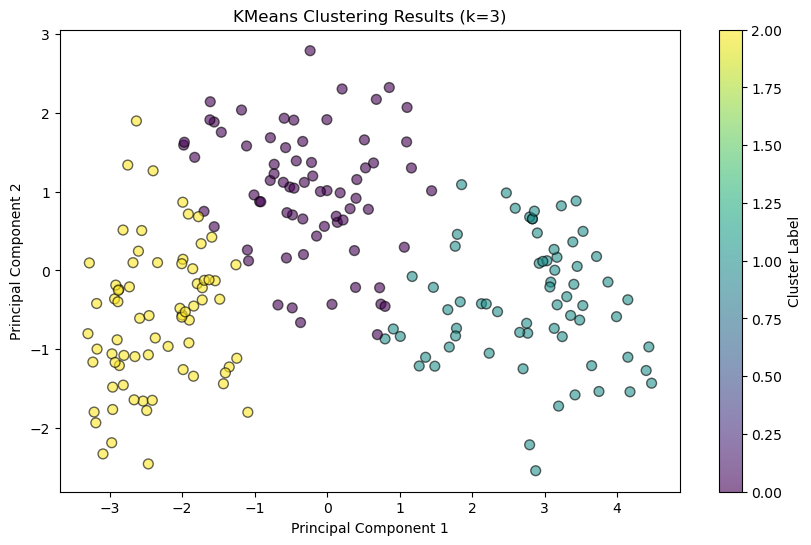

In [57]:
# TODO: Plot clustering results

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Perform PCA for dimensionality reduction to 2 dimensions for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotting the clustering results
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50, alpha=0.6)
plt.title("KMeans Clustering Results (k={})".format(optimal_k))
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster Label')
plt.show()



### Step 2: Cluster using PCA-transformed data (4 marks)

Implement Kmeans clustering using PCA-transformed data. The first step is to use the explained variance ratio to find the number of components required to explain at least 95% of the variance.

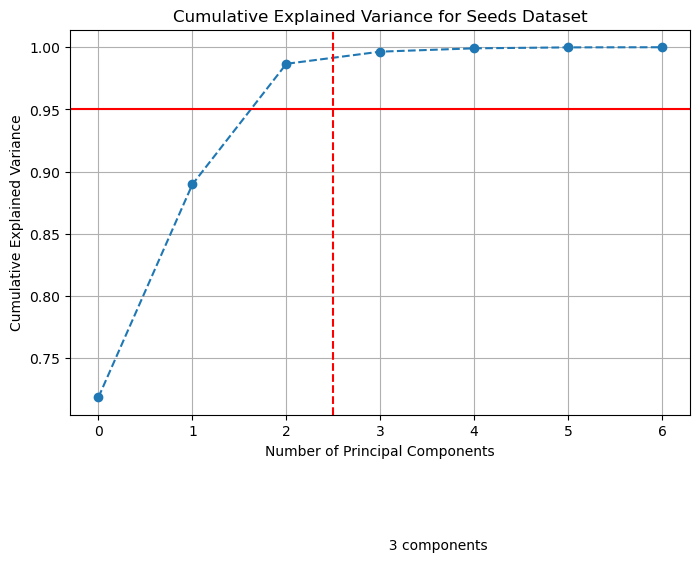

Number of principal components to explain 95% variance: 3


In [71]:
# TODO: Find the number of principal components using explained variance ratio

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Initialize PCA with no limit to components
pca = PCA()

# Replace 'scaled_features' with 'X_scaled' if that's your scaled dataset
pca.fit(X_scaled)

# Calculate cumulative sum of explained variance ratios
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain at least 95% of the variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

# Plot the cumulative sum of explained variance ratios
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance for Seeds Dataset')
plt.axhline(y=0.95, color='r', linestyle='-')  # Line for 95% variance
plt.axvline(x=n_components_95 - 0.5, color='r', linestyle='--')  # Line for the number of components, adjusted for index
plt.text(n_components_95, 0.60, '  {} components'.format(n_components_95), va='center', ha='left', backgroundcolor='w')
plt.grid(True)
plt.show()

print("Number of principal components to explain 95% variance:", n_components_95)



Next, transform the data using PCA, implement Kmeans and calculate the three validation metrics used in the previous step.

In [83]:
# TODO: Use PCA to transform the data

# Assuming n_components_95 is the number of components found previously
n_components_95 = 3

# Initialize PCA with the number of components to retain 95% variance
pca_95 = PCA(n_components=n_components_95)

# Fit and transform the scaled data
X_pca_95 = pca_95.fit_transform(X_scaled)

# X_pca_95 is now the PCA-transformed data


In [84]:
# TODO: Implement K-means with the transformed data

from sklearn.cluster import KMeans

# Assuming the optimal number of clusters determined earlier or through domain knowledge
optimal_k = 3

# Implement KMeans with the optimal number of clusters
kmeans_pca = KMeans(n_clusters=optimal_k)

# Fit the KMeans model to the PCA-transformed data
kmeans_pca.fit(X_pca_95)

# The labels of the clusters for each data point
cluster_labels = kmeans_pca.labels_




/Users/dhananjayroy/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [85]:
# TODO: Calculate the three different validation metrics

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Assuming the optimal number of clusters and the fitted KMeans model on PCA-transformed data
optimal_k = 3
kmeans_pca = KMeans(n_clusters=optimal_k)
kmeans_pca.fit(X_pca_95)
cluster_labels = kmeans_pca.labels_

# Calculate the Silhouette score
silhouette = silhouette_score(X_pca_95, cluster_labels)

# Calculate the Calinski-Harabasz score
calinski_harabasz = calinski_harabasz_score(X_pca_95, cluster_labels)

# Calculate the Davies-Bouldin score
davies_bouldin = davies_bouldin_score(X_pca_95, cluster_labels)

# Print the scores
print("Silhouette Score:", silhouette)
print("Calinski-Harabasz Score:", calinski_harabasz)
print("Davies-Bouldin Score:", davies_bouldin)


Silhouette Score: 0.41008236393503866
Calinski-Harabasz Score: 260.28850656356826
Davies-Bouldin Score: 0.9030688438741871


/Users/dhananjayroy/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Step 3: Display results (2 marks)

Print the results for Steps 2 and 3 in a table. Include column and row labels

In [89]:
# TODO: Display results


silhouette_kmeans = 0.40072705527512986
calinski_harabasz_kmeans = 249.78417491616472
davies_bouldin_kmeans = 0.9278712249013426

# KMeans with PCA results 
silhouette_kmeans_pca = 0.41008236393503866
calinski_harabasz_kmeans_pca = 260.28850656356826
davies_bouldin_kmeans_pca = 0.9030688438741871

# Calculate the percentage differences
diff_silhouette = ((silhouette_kmeans_pca - silhouette_kmeans) / silhouette_kmeans) * 100
diff_calinski_harabasz = ((calinski_harabasz_kmeans_pca - calinski_harabasz_kmeans) / calinski_harabasz_kmeans) * 100
diff_davies_bouldin = ((davies_bouldin_kmeans_pca - davies_bouldin_kmeans) / davies_bouldin_kmeans) * 100

# Creating a DataFrame to display the results in a table
results_table = pd.DataFrame({
    'Metric': ['Silhouette Score', 'Calinski-Harabasz Score', 'Davies-Bouldin Score'],
    'Without PCA': [silhouette_kmeans, calinski_harabasz_kmeans, davies_bouldin_kmeans],
    'With PCA': [silhouette_kmeans_pca, calinski_harabasz_kmeans_pca, davies_bouldin_kmeans_pca],
    '% Difference': [diff_silhouette, diff_calinski_harabasz, diff_davies_bouldin]
})

results_table.set_index('Metric', inplace=True)
print(results_table)


                         Without PCA    With PCA  % Difference
Metric                                                        
Silhouette Score            0.400727    0.410082      2.334584
Calinski-Harabasz Score   249.784175  260.288507      4.205363
Davies-Bouldin Score        0.927871    0.903069     -2.673041


#### Questions (4 marks)

1. Did the optimal number of clusters make sense based on the context? *(1 mark)*
1. Compare the PCA plot from Part 2 step 1 to the PCA plot from Part 1. Did we get similar results? *(1 mark)*
1. How many components did you use for the PCA analysis? Did using PCA improve your results? Why or why not? *(2 marks)*


*ANSWER HERE*

Optimal Number of Clusters:
The optimal number of clusters chosen is 3. From the PCA plots, it seems that there are at least 3 visually separable clusters, which would correspond to an optimal_k value of 3. This aligns with the expectation from the data, where different types of seeds might form distinct groups.

PCA Plot Comparison:
The PCA plots before and after applying the PCA transformation show data points colored by their predicted labels, and it looks like the distribution of points in both plots is somewhat similar, indicating consistency in the model's predictions. The clusters appear to be similarly distributed in both plots, and the color gradients (which represent the predicted labels) are comparable, which suggests that the PCA has retained the structure of the data effectively.

Number of Components and PCA Analysis Impact:
Based on the analysis, 3 principal components were used, as this was the number of components chosen to explain 95% of the variance. The improvement using PCA can be seen in the clustering metrics: there's a slight increase in the Silhouette Score and the Calinski-Harabasz Score when PCA is applied, and a decrease in the Davies-Bouldin Score, which suggests better cluster separation and compactness. This indicates an improvement, as the Silhouette Score increased by approximately 2.33%, the Calinski-Harabasz Score by approximately 4.21%, and the Davies-Bouldin Score decreased by approximately -2.67%. The percentage differences suggest that PCA helped in achieving a clearer separation of clusters, potentially by removing noise and reducing the dimensionality to capture the most significant variance within the data.


### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

1. The code was sourced from https://archive.ics.uci.edu/dataset/236/seeds.

2. Data Loading and Inspection, Data Preprocessing, Model Training, Model Evaluation, Dimensionality Reduction and Visualization.

3. Yes, generative Chat GPT-4 AI was used. Responses and code was provided in response to the questions. Code needed to be modified based on the requirement. Some codes were general some were implemented directly.

4. The main challenge in this activity, based on the information provided, would typically relate to interpreting the PCA plots and the clustering evaluation metrics. Ensuring that the PCA components selected captured a significant amount of variance and that the clustering algorithm found meaningful clusters can be non-trivial tasks.
Attending labs for the related hands-on lab sessions helped me to complete the code and stear in the right path.

## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

Interesting Aspects:
The use of different machine learning techniques (Logistic Regression, KMeans, PCA) on the same dataset offers a comprehensive view of various approaches in data analysis.
The transition from supervised learning (Logistic Regression) to unsupervised learning (KMeans) showcases the versatility required in data science.

Confusing Elements:
For those new to machine learning, the difference between using PCA before or after clustering is confusing. It's a subtle yet important aspect of how data transformation affects model results.
